In [384]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv


In [385]:
import pandas as pd
import numpy as np

df = pd.read_csv("/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Preparing a copy of dataset for Power BI visualisation

In [386]:
df_viz = df.copy()
df_viz = df_viz.drop(columns=['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18'])
df_viz['TenureGroup'] = pd.cut(df_viz['YearsAtCompany'], bins=[0,2,5,10,50], labels=['0-2','3-5','6-10','10+'])
df_viz['AgeGroup'] = pd.cut(df_viz['Age'], bins=[18,25,30,35,60], labels=['18-25','26-30','31-35','36+'])
df_viz.to_csv("HR_Attrition_ForPowerBI.csv", index=False)

In [414]:
df_viz

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TenureGroup,AgeGroup
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,0,8,0,1,6,4,0,5,6-10,36+
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,1,10,3,3,10,7,1,7,6-10,36+
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,0,7,3,3,0,0,0,0,NaN,36+
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,0,8,3,3,8,7,3,0,6-10,31-35
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,1,6,3,3,2,2,2,2,0-2,26-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,1,17,3,3,5,2,0,3,3-5,36+
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,1,9,5,3,7,7,1,7,6-10,36+
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,1,6,0,3,6,2,0,3,6-10,26-30
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,0,17,3,2,9,6,0,8,6-10,36+


In [415]:
import os
os.listdir('/kaggle/working/')

['.virtual_documents', 'HR_Attrition_ForPowerBI.csv']

# Exploratory Data Analysis (EDA)

In [387]:
df.shape

(1470, 35)

In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [389]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [390]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [391]:
df.duplicated().sum()

0

In [392]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [393]:
df.describe(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Age Distribution of Employees')

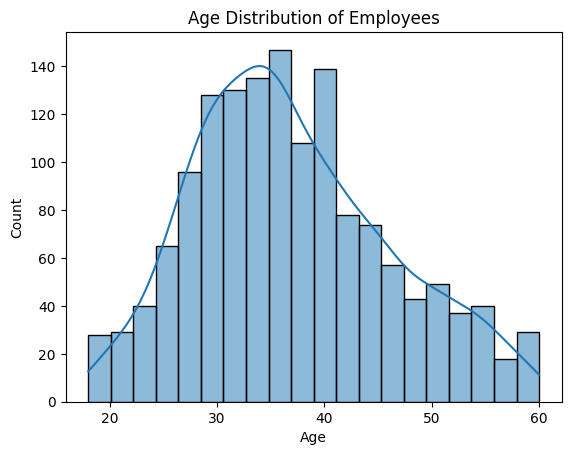

In [394]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution of Employees')

<Axes: xlabel='Attrition', ylabel='count'>

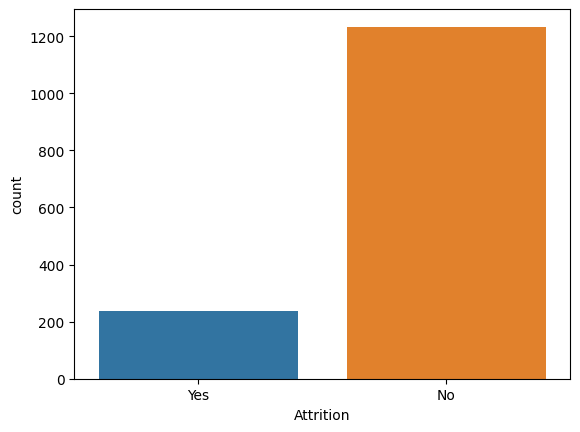

In [395]:
sns.countplot(x='Attrition', data=df)

<Axes: xlabel='Department', ylabel='count'>

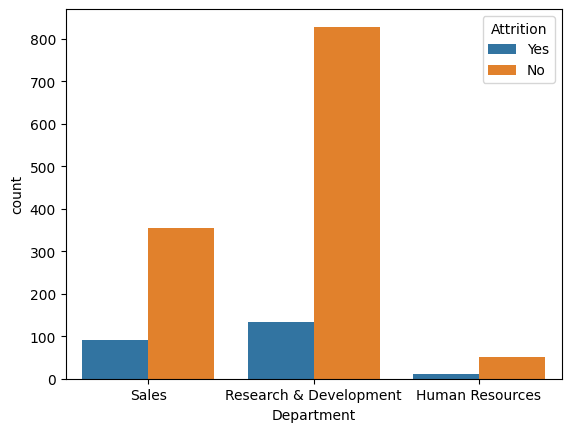

In [396]:
sns.countplot(x='Department', hue='Attrition', data=df)

<Axes: xlabel='Gender', ylabel='count'>

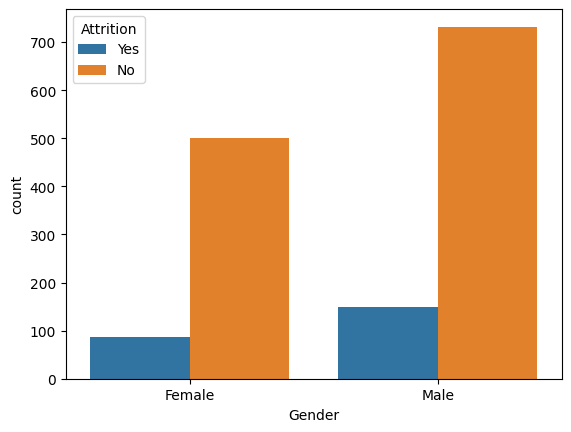

In [397]:
sns.countplot(x='Gender', hue='Attrition', data=df)

<Axes: xlabel='Attrition', ylabel='MonthlyIncome'>

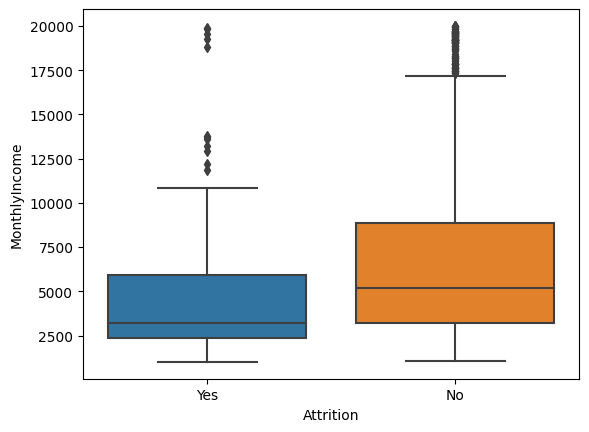

In [398]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


<Axes: >

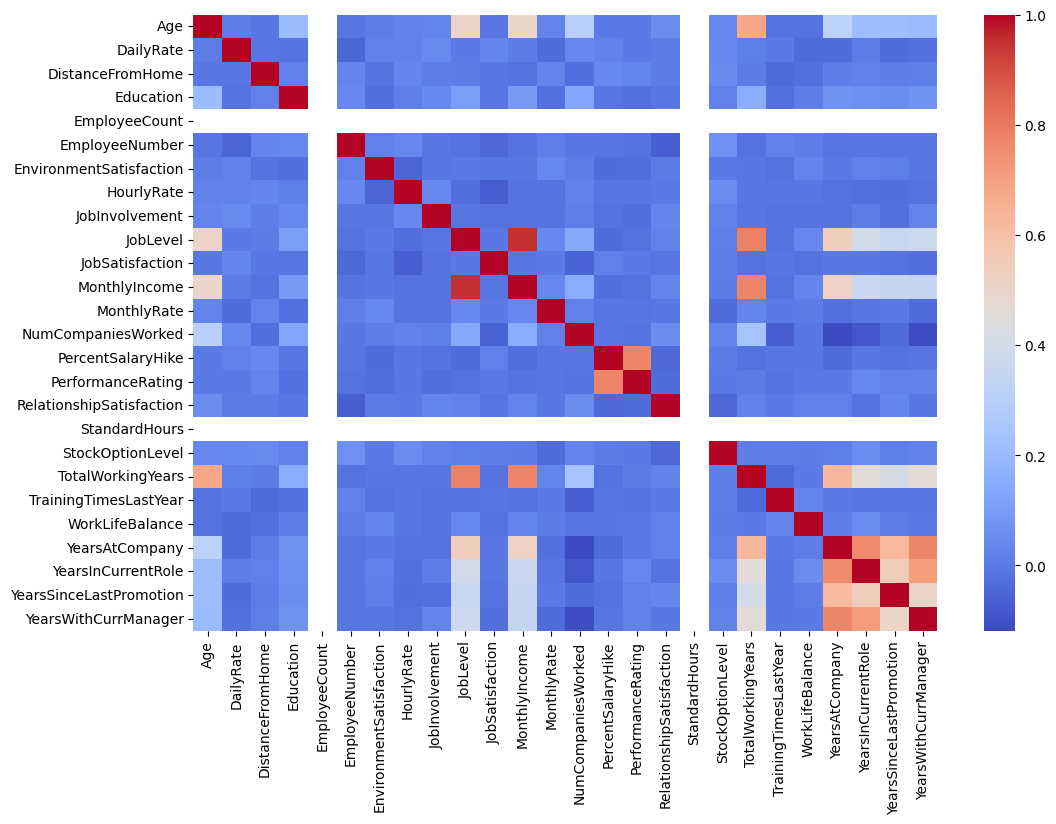

In [399]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm')

In [400]:
df['Attrition_Flag'] = df['Attrition'].map({'Yes': 1, 'No': 0})
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_with_attrition = numeric_df.corr()['Attrition_Flag'].sort_values(ascending=False)
print(corr_with_attrition.head(10))

Attrition_Flag             1.000000
DistanceFromHome           0.077924
NumCompaniesWorked         0.043494
MonthlyRate                0.015170
PerformanceRating          0.002889
HourlyRate                -0.006846
EmployeeNumber            -0.010577
PercentSalaryHike         -0.013478
Education                 -0.031373
YearsSinceLastPromotion   -0.033019
Name: Attrition_Flag, dtype: float64


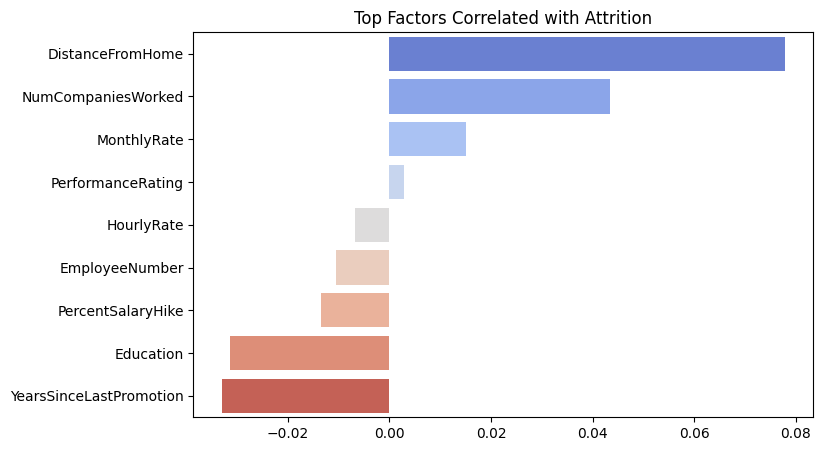

In [401]:
top_corr = corr_with_attrition.head(10).drop('Attrition_Flag')

plt.figure(figsize=(8,5))
sns.barplot(x=top_corr.values, y=top_corr.index, palette='coolwarm')
plt.title("Top Factors Correlated with Attrition")
plt.show()

<Axes: xlabel='Age', ylabel='MonthlyIncome'>

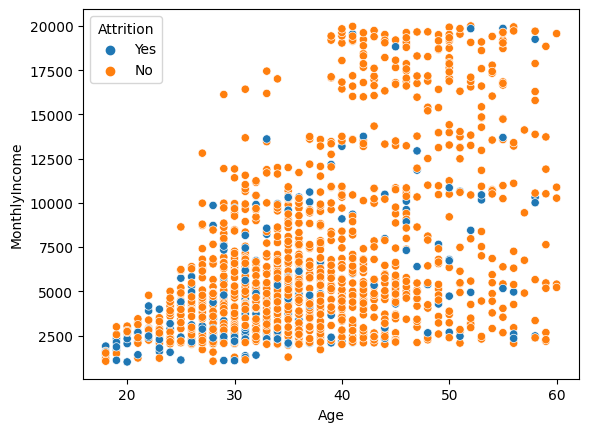

In [402]:
sns.scatterplot(x='Age', y='MonthlyIncome', hue='Attrition', data=df)

<Axes: xlabel='JobRole', ylabel='YearsAtCompany'>

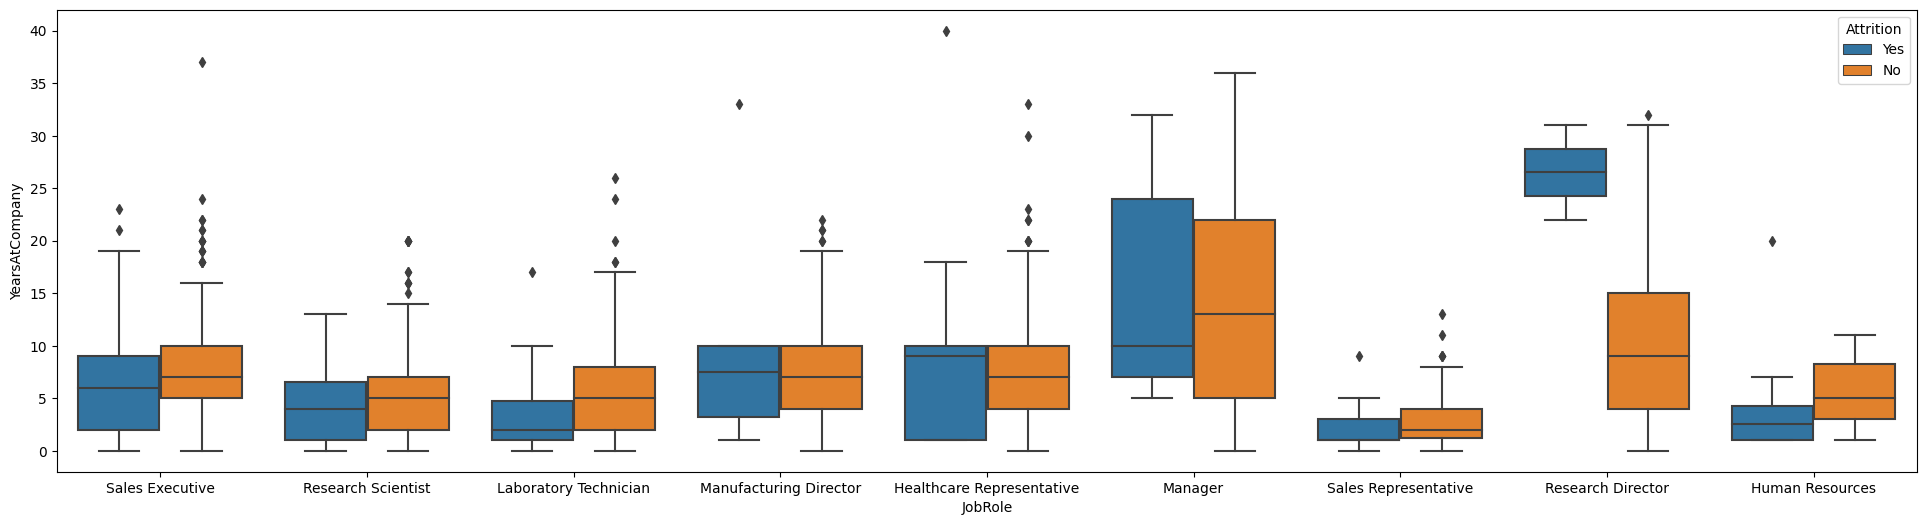

In [403]:
plt.figure(figsize=(24,6))
sns.boxplot(x='JobRole', y='YearsAtCompany', hue='Attrition', data=df)

# Feature Engineering and Predictive Modeling

### Encode Categorical Variables

In [404]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
le = LabelEncoder()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

### Drop Redundant Info

In [405]:
df_encoded = df_encoded.drop(['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18'], axis=1)

### Train Test Split

In [406]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Attrition_Flag', axis=1)
y = df_encoded['Attrition_Flag']
X = X.drop(columns=['Attrition', 'Attrition_Flag'], errors='ignore')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Logistic Regression and Classification Report

In [407]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=2000, solver='lbfgs'))
])

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)


In [408]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8741496598639455
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       247
           1       0.69      0.38      0.49        47

    accuracy                           0.87       294
   macro avg       0.79      0.68      0.71       294
weighted avg       0.86      0.87      0.86       294



### Decision Tree Classifier and Classification Report

In [409]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8435374149659864
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       247
           1       0.53      0.19      0.28        47

    accuracy                           0.84       294
   macro avg       0.70      0.58      0.60       294
weighted avg       0.81      0.84      0.81       294



### Checking Target Variable Leakage

In [410]:
[attr for attr in X.columns if 'Attrition' in attr]

[]

### Checking Class Balance

In [411]:
print(y.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

Attrition_Flag
0    0.838776
1    0.161224
Name: proportion, dtype: float64
Attrition_Flag
0    0.840136
1    0.159864
Name: proportion, dtype: float64


# Feature Importance

### Feature Importance (Logistic Regression)

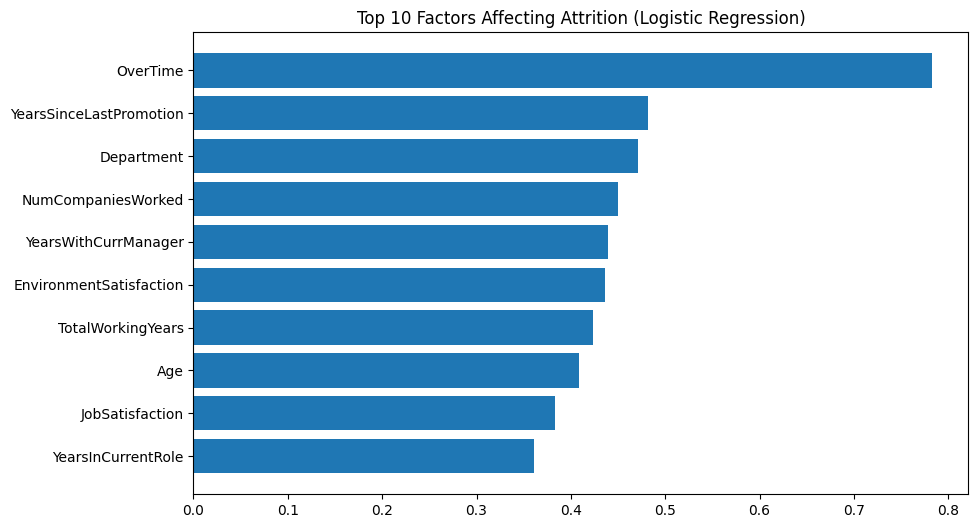

In [412]:
import numpy as np
importance = lr_pipeline.named_steps['model'].coef_[0]
features = X.columns
indices = np.argsort(np.abs(importance))[::-1]

plt.figure(figsize=(10,6))
plt.barh(np.array(features)[indices][:10], np.abs(importance)[indices][:10])
plt.title("Top 10 Factors Affecting Attrition (Logistic Regression)")
plt.gca().invert_yaxis()
plt.show()

### Feature Importance (Decision Tree)

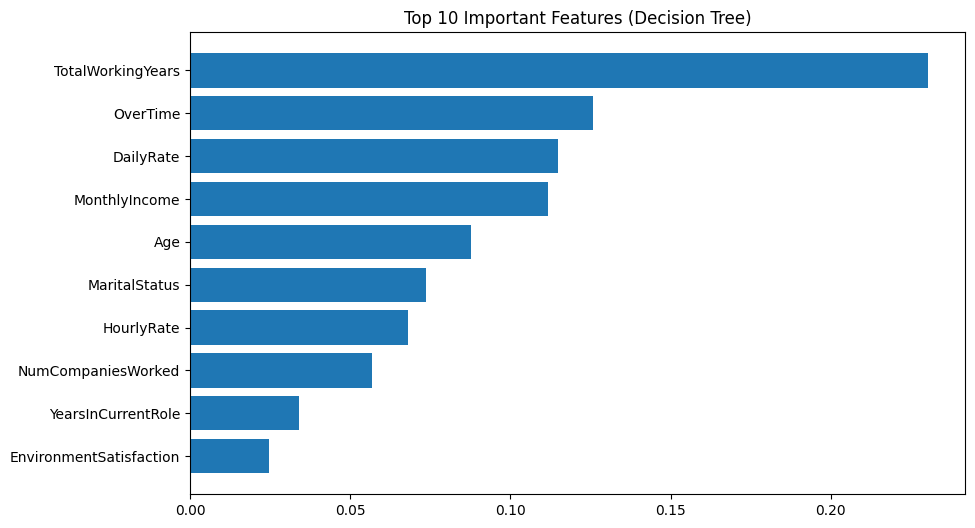

In [413]:
importances = dt.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.barh(X.columns[indices][:10], importances[indices][:10])
plt.title("Top 10 Important Features (Decision Tree)")
plt.gca().invert_yaxis()
plt.show()